In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import random
import math

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
import copy
x_tmp = copy.deepcopy(x_test[0])

In [25]:
#test
u = 0
sig = math.sqrt(0.2) # 标准差δ
x_ = random.uniform(u - 3*sig, u + 3*sig)
#x_ = 0
y_sig = np.exp(-(x_ - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig)
print(x_)
print(y_sig)

0.5463933446549394
0.42291511463491693


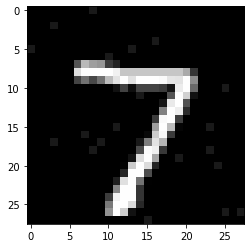

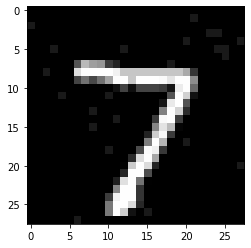

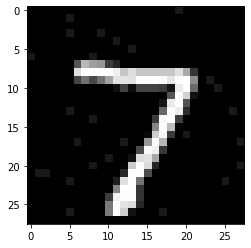

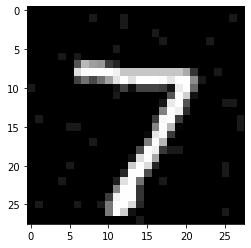

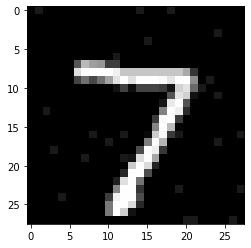

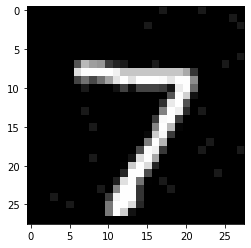

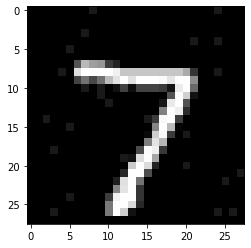

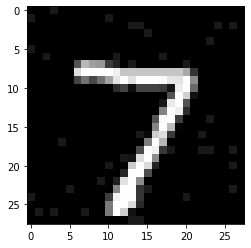

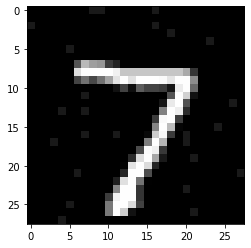

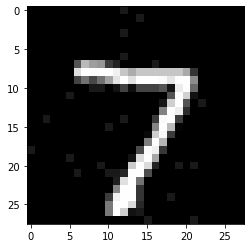

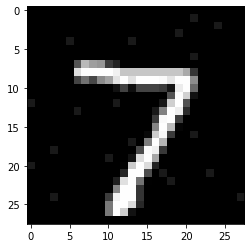

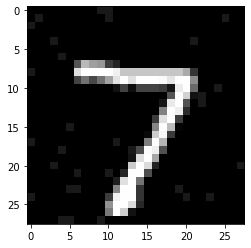

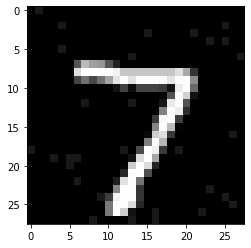

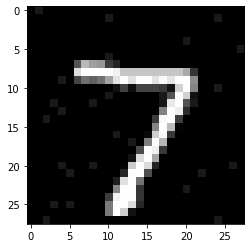

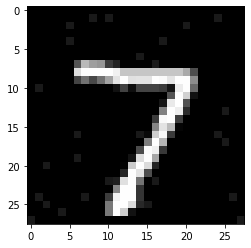

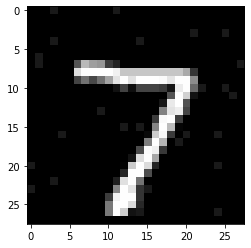

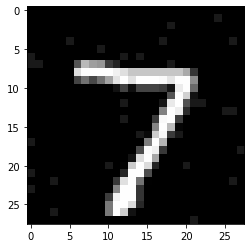

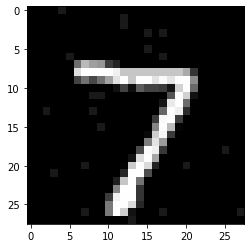

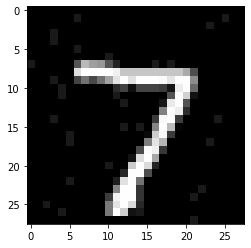

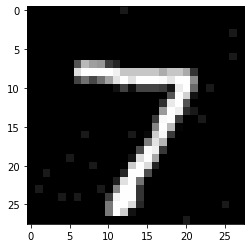

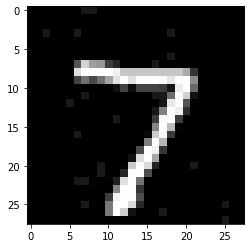

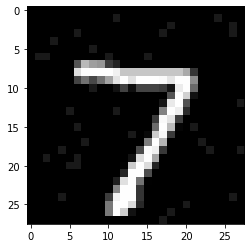

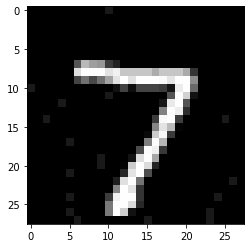

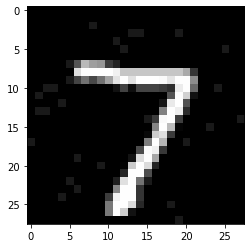

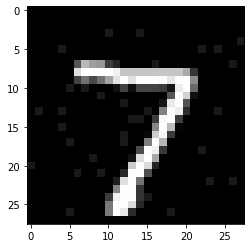

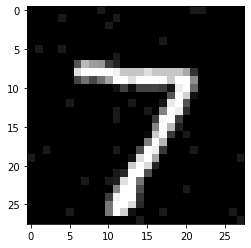

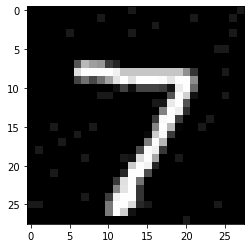

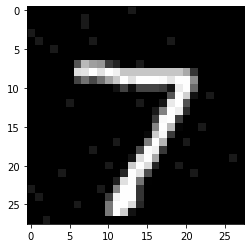

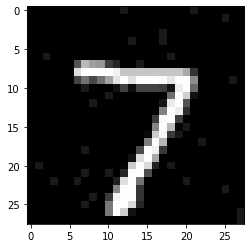

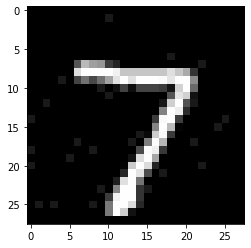

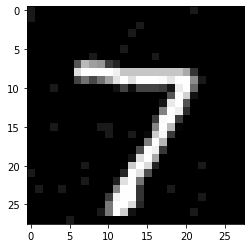

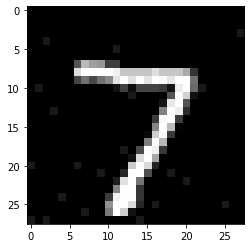

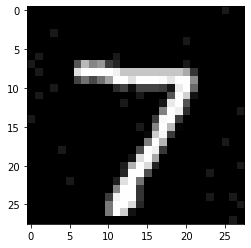

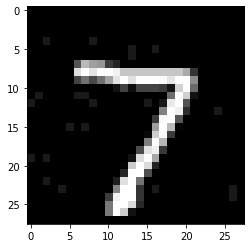

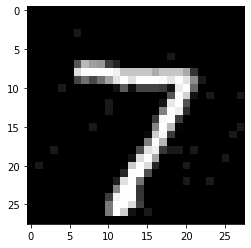

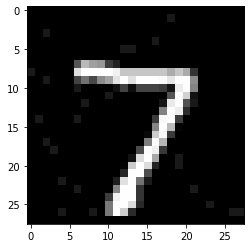

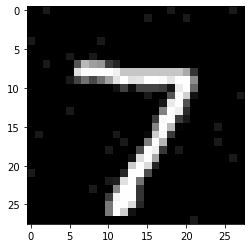

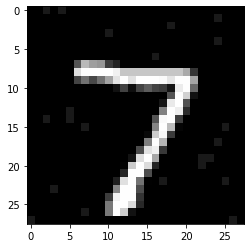

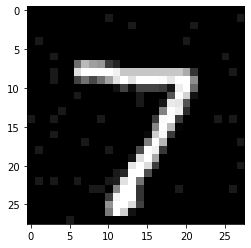

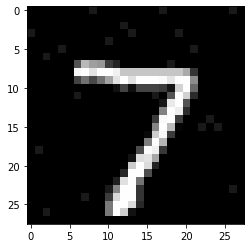

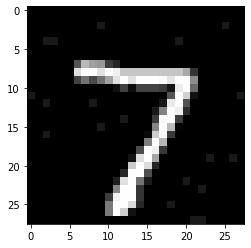

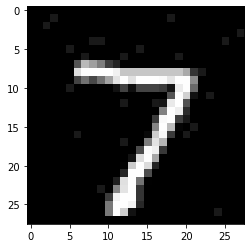

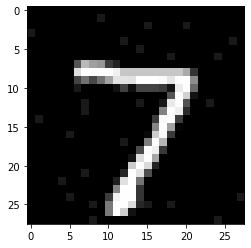

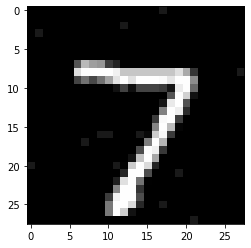

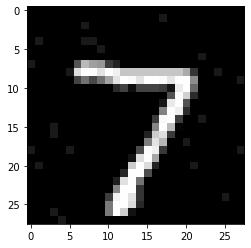

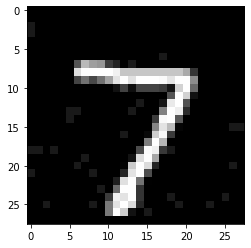

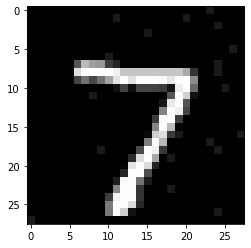

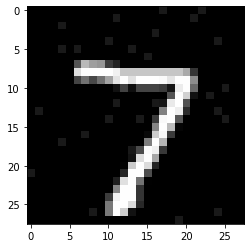

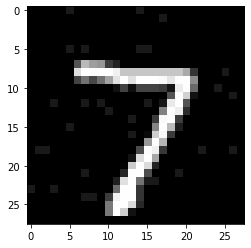

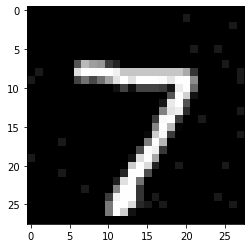

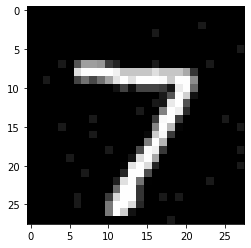

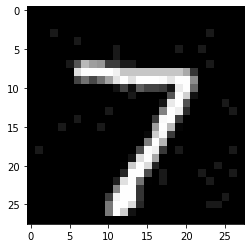

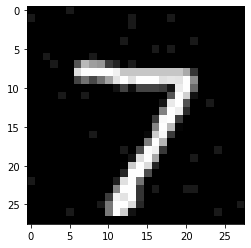

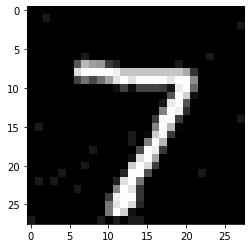

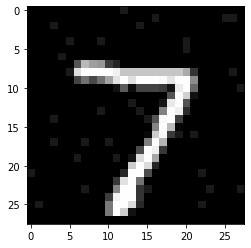

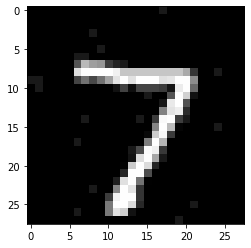

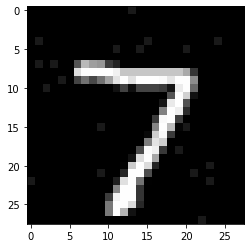

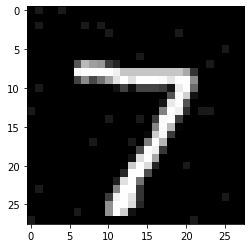

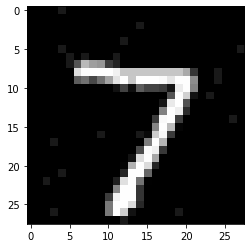

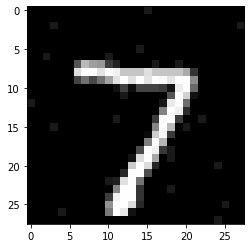

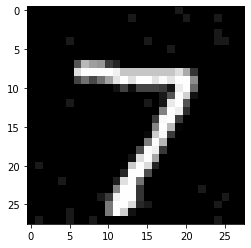

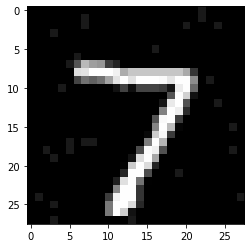

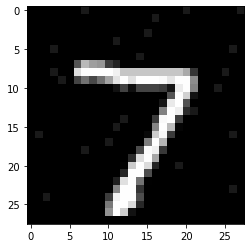

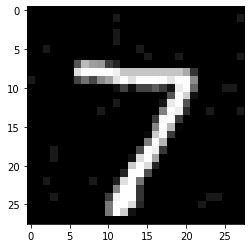

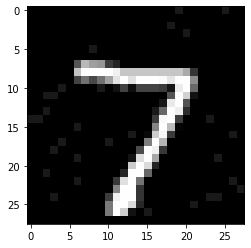

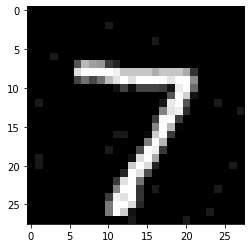

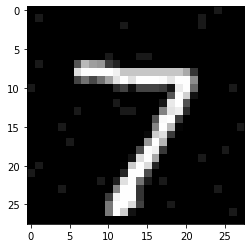

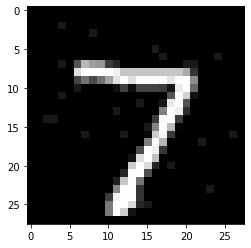

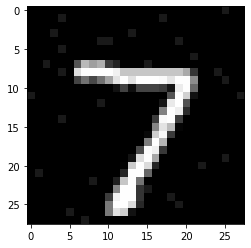

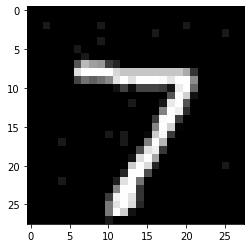

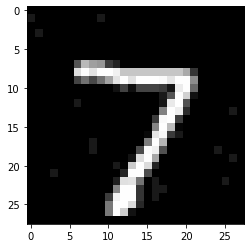

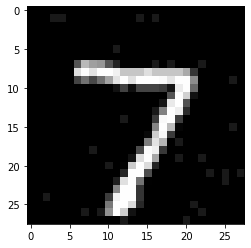

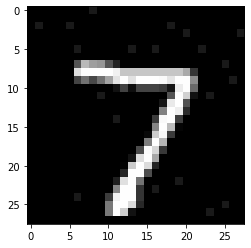

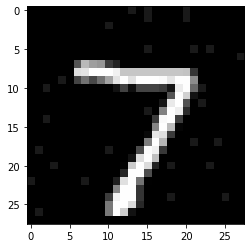

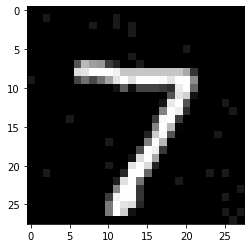

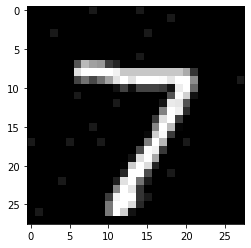

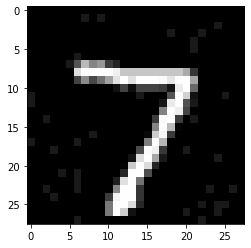

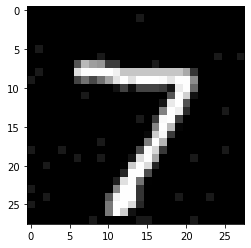

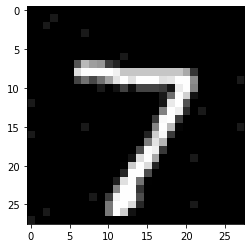

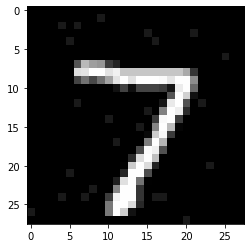

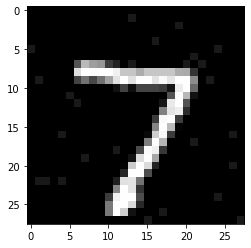

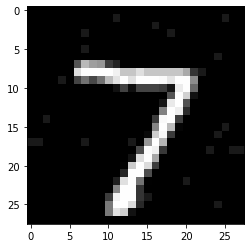

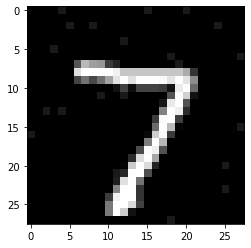

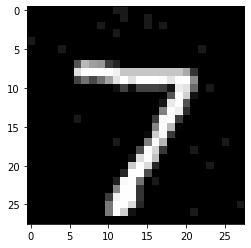

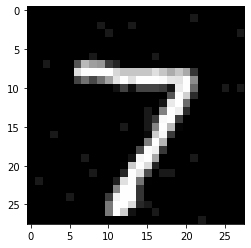

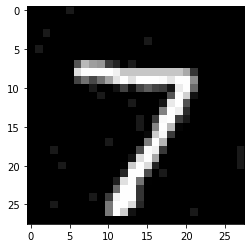

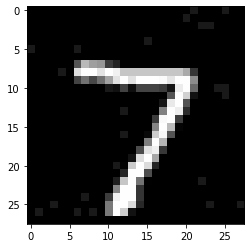

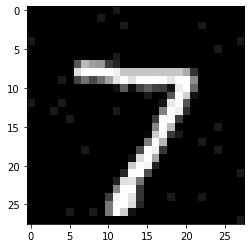

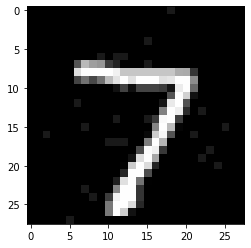

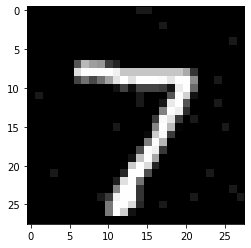

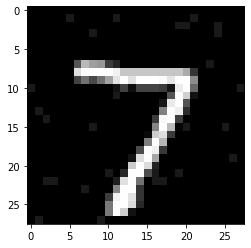

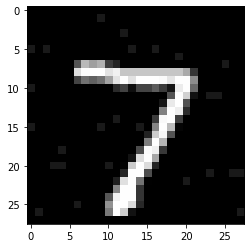

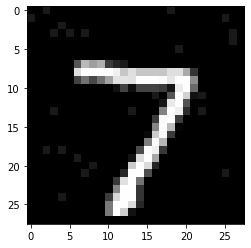

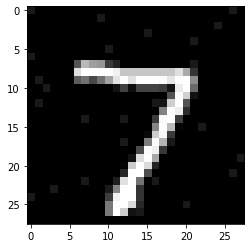

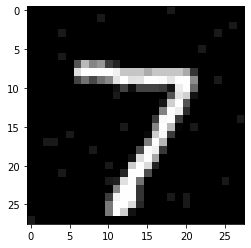

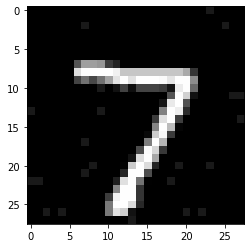

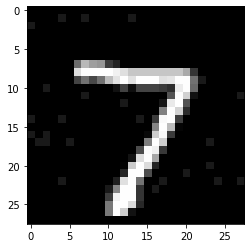

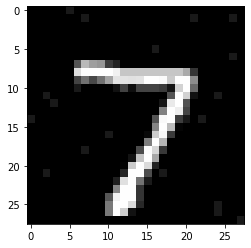

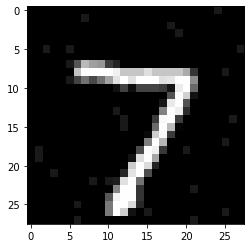

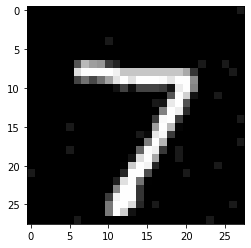

In [4]:
#产生扰动种群
x_des = []
for r in range(100):
    for i in range(28):
        for j in range(28):
            x= random.randint(0,10000)/10000
            if x <= 0.1:
                u = x_tmp[i,j] # 期望值μ
                sig = math.sqrt(0.2) # 标准差δ
                x_ = random.uniform(u - 3*sig, u + 3*sig)
                y_sig = np.exp(-(x_ - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig)
                y_= random.randint(0,10000)/10000
                if y_ <= y_sig:
                    if x_test[0][i,j] <= 127:
                        x_tmp[i,j] += 255*0.1
                    elif x_test[0][i,j] > 127 and x_test[0][i,j] < 229:
                        y = random.randint(0,10000)/10000
                        if y <= 0.5:
                            x_tmp[i,j] += 255*0.1
                        else:
                            x_tmp[i,j] -= 255*0.1
                    elif x_test[0][i,j] >= 229:
                        x_tmp[i,j] -= 255*0.1
    x_t = x_tmp/255-x_test[0]/255
    #x_des.append(np.array (x_t.reshape(1,784)))
    x_des.append(np.array(x_t.reshape(1,784)))
    plt.imshow(x_tmp,cmap='gray')
    plt.show()
    x_tmp = copy.deepcopy(x_test[0])

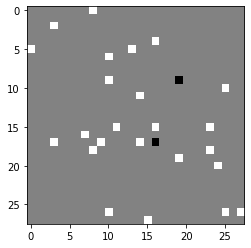

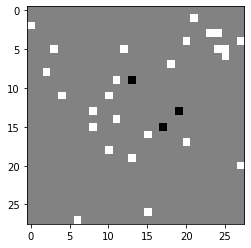

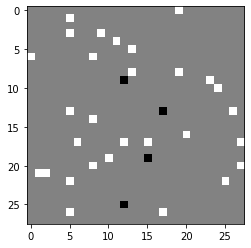

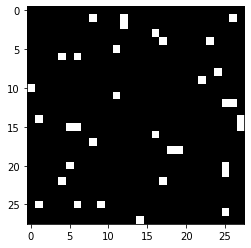

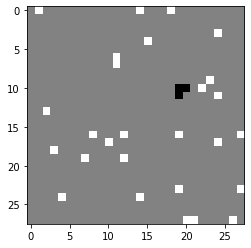

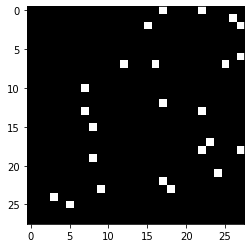

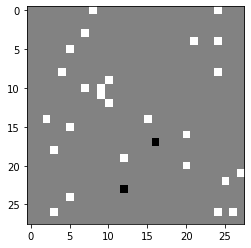

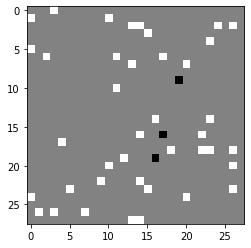

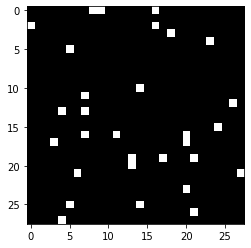

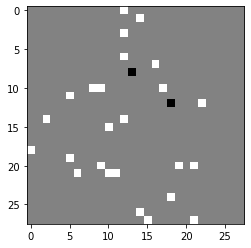

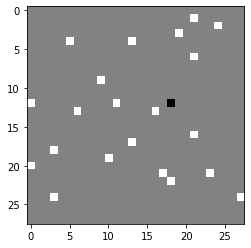

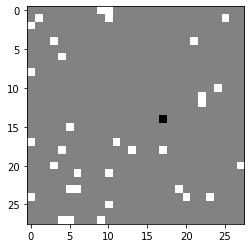

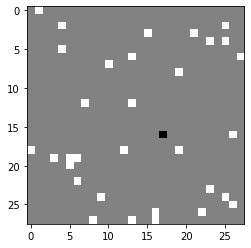

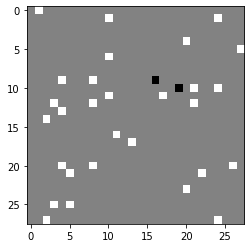

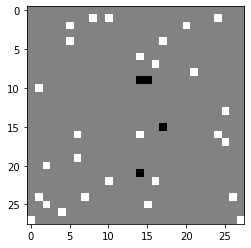

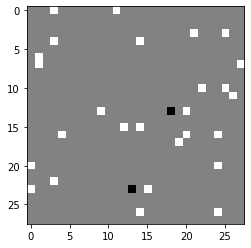

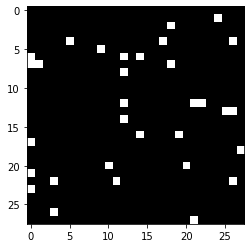

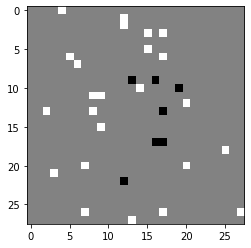

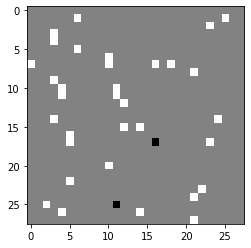

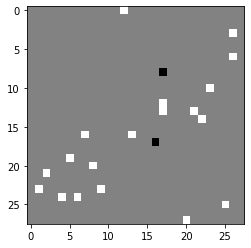

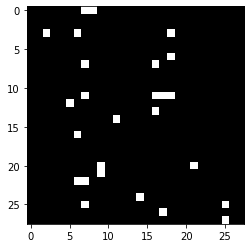

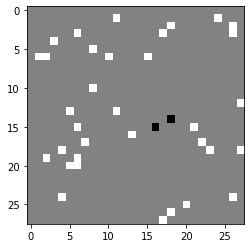

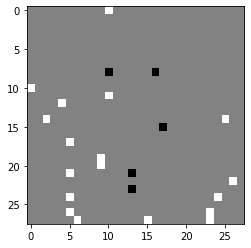

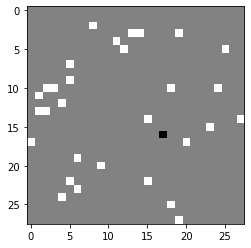

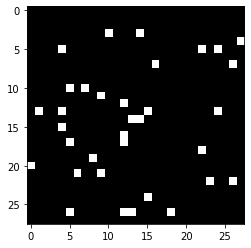

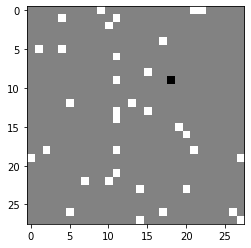

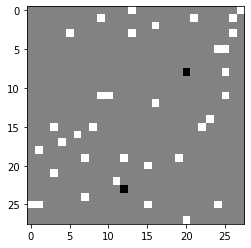

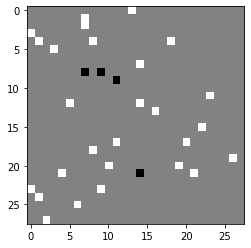

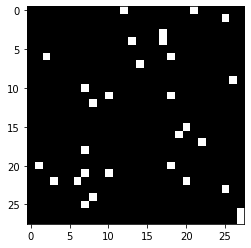

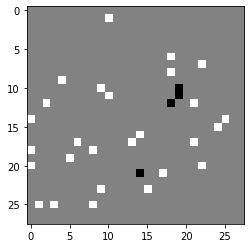

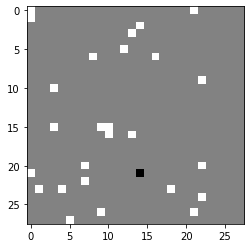

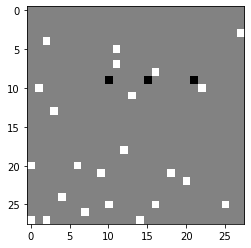

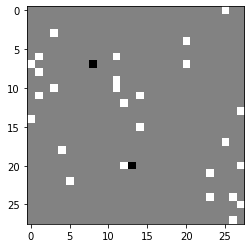

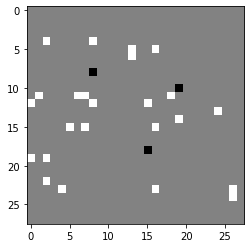

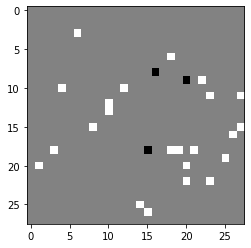

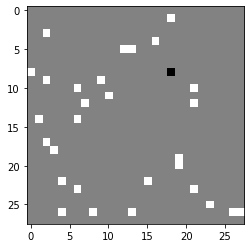

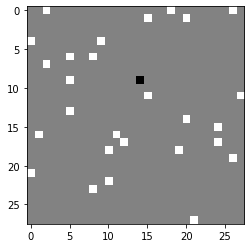

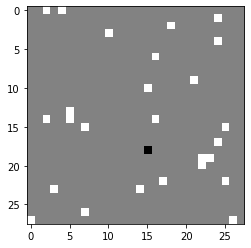

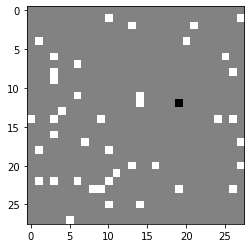

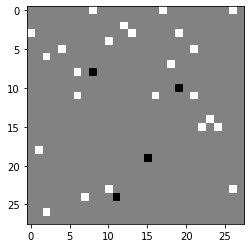

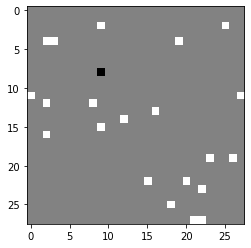

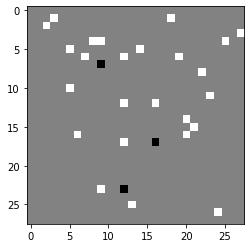

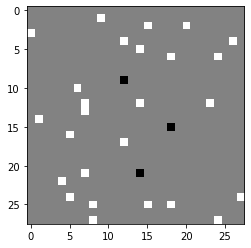

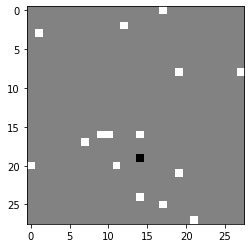

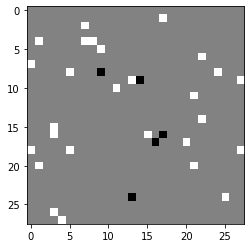

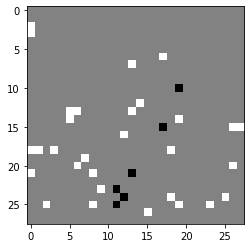

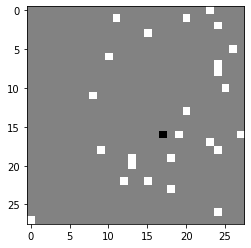

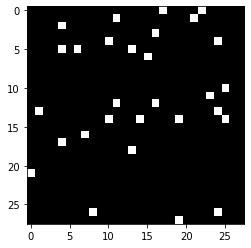

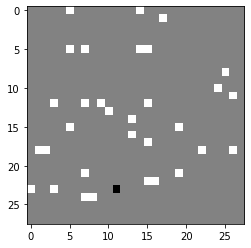

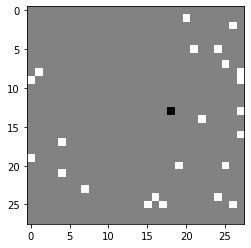

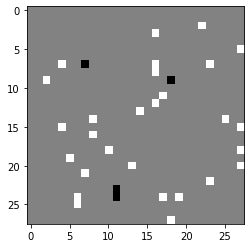

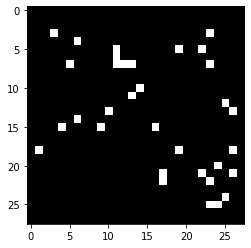

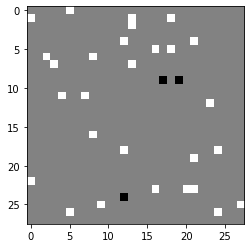

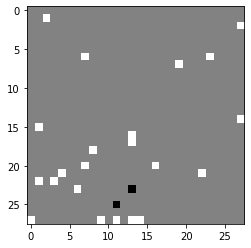

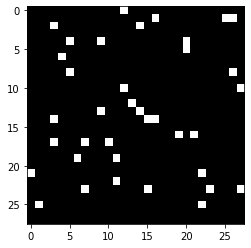

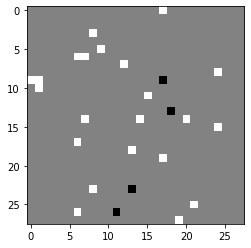

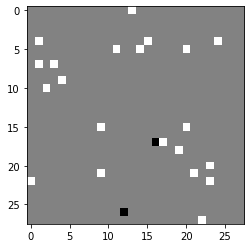

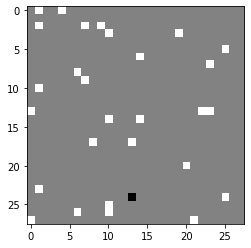

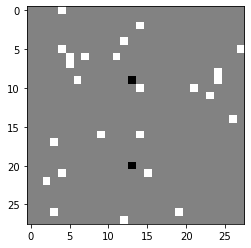

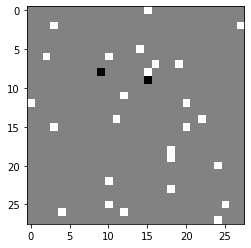

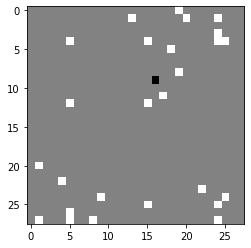

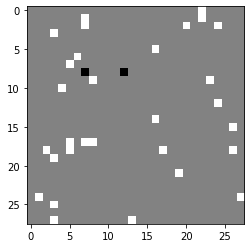

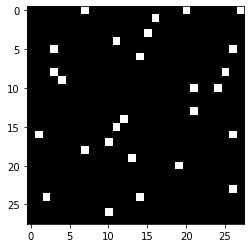

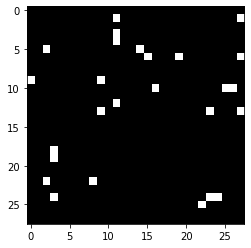

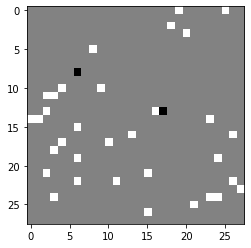

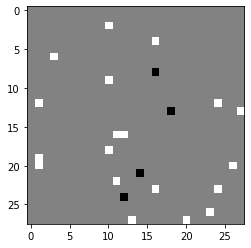

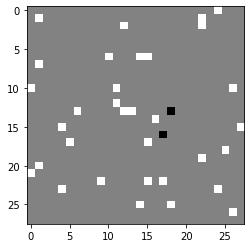

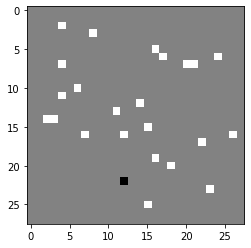

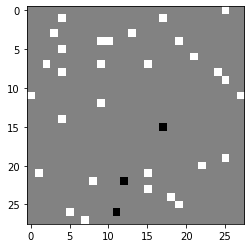

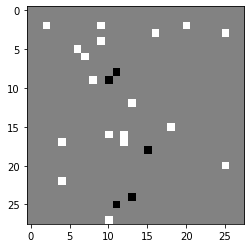

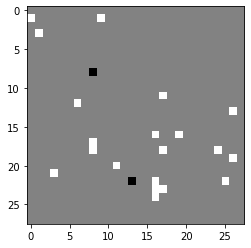

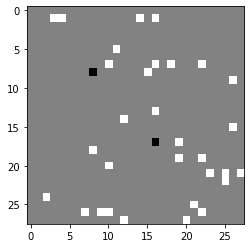

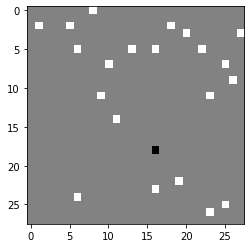

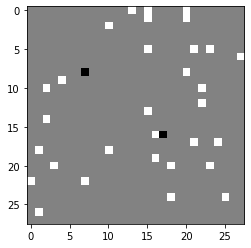

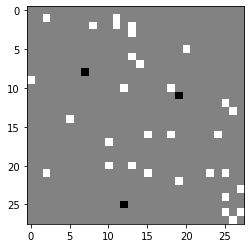

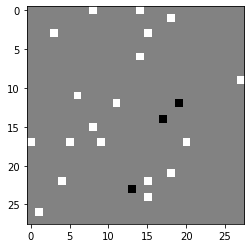

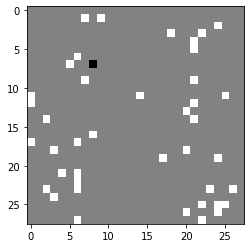

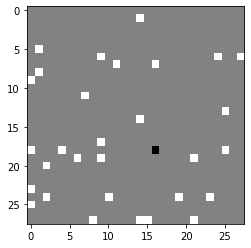

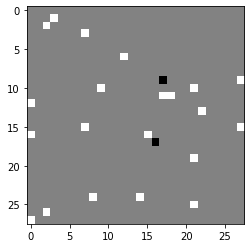

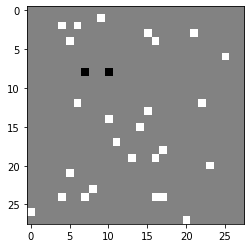

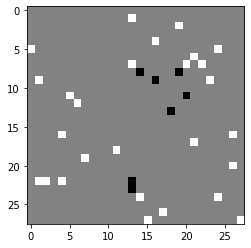

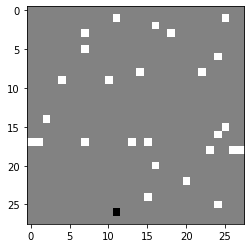

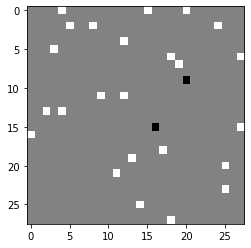

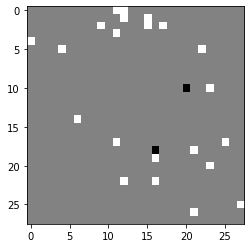

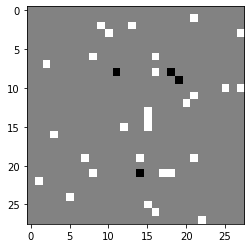

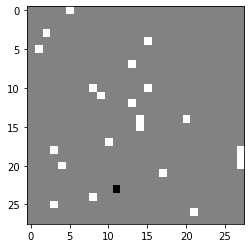

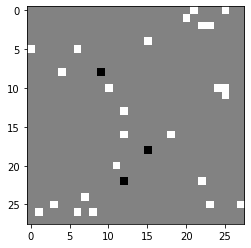

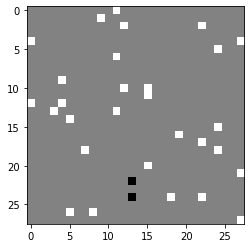

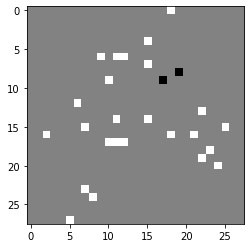

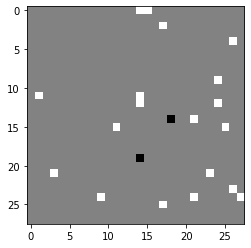

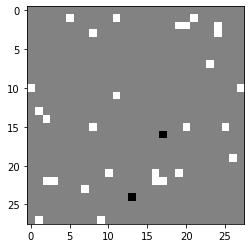

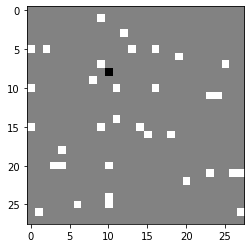

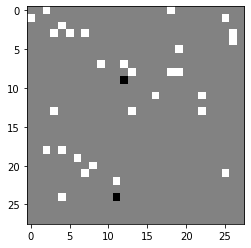

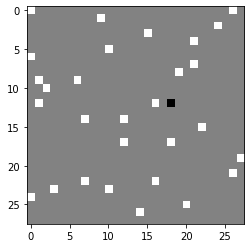

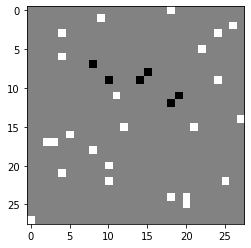

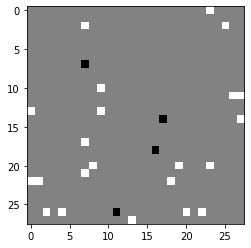

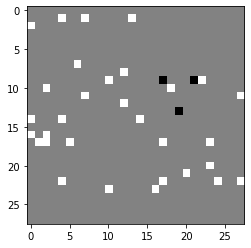

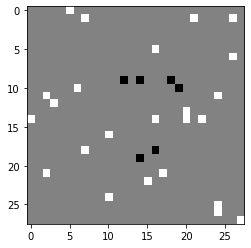

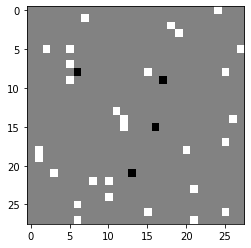

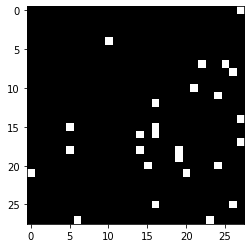

In [5]:
# test
for i in range(100):
    Xr = x_des[i].reshape(28,28)
    plt.imshow(Xr,cmap='gray')
    plt.show()

In [17]:
x_des[5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.2       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.27843137,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [6]:
x_train = x_train.reshape(60000,784)    # 将图片摊平，变成向量

In [7]:
x_test = x_test.reshape(10000,784)     # 对测试集进行同样的处理

In [8]:
x_train = x_train / 255
x_test = x_test / 255 

In [9]:
model = load_model('mnist_model.h5')

In [21]:
# test
X = np.concatenate(x_des, axis=0)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# test
X = np.array(x_des)
X[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [10]:
#test
x_test[0].shape

(784,)

In [10]:
def Func(x):
    x_F = x[:]+x_test[0]
    result=model.predict(x_F.reshape(1,784))
    return result[0][7]

最优值： 0.9965153
最优值： 0.9965101
最优值： 0.9964038
最优值： 0.9963381
最优值： 0.99630284
最优值： 0.9960867
最优值： 0.99599445
最优值： 0.9958412
最优值： 0.9955979
最优值： 0.99556905
最优值： 0.9955006
最优值： 0.9954169
最优值： 0.99534804
最优值： 0.9951439
最优值： 0.99496424
最优值： 0.99488896
最优值： 0.9946754
最优值： 0.9947866
最优值： 0.9943922
最优值： 0.9941614
最优值： 0.9936845
最优值： 0.9935759
最优值： 0.9934843
最优值： 0.99321955
最优值： 0.9931779
最优值： 0.99303645
最优值： 0.9927481
最优值： 0.9921812
最优值： 0.99232835
最优值： 0.9921556
最优值： 0.9915515
最优值： 0.9911343
最优值： 0.99068964
最优值： 0.9907464
最优值： 0.99003005
最优值： 0.9897579
最优值： 0.9895377
最优值： 0.9895118
最优值： 0.9893588
最优值： 0.98928946
最优值： 0.98819864
最优值： 0.9882476
最优值： 0.9878456
最优值： 0.98776966
最优值： 0.986702
最优值： 0.986801
最优值： 0.98651206
最优值： 0.9847877
最优值： 0.98496467
最优值： 0.9841658
最优值： 0.9842218
最优值： 0.9827802
最优值： 0.9827947
最优值： 0.9808483
最优值： 0.98063344
最优值： 0.9801908
最优值： 0.9798839
最优值： 0.9797172
最优值： 0.9792723
最优值： 0.9793773
最优值： 0.97847307
最优值： 0.97802734
最优值： 0.97779673
最优值： 0.9761593
最优值： 0.9758852
最优值： 0.

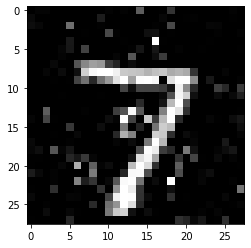

代数： [215.]
平均代数： 215.0


In [11]:
MAX_GENERATION = 2000  # 最大迭代次数
GENERATION = 0  # 当前代数
L = 784  # 种子的维度
N = 100  # 种群规模
SIGMA = 0.333  # 缩放因子
CR = 0.1  # 交叉概率
E = 0.3
T = 1
G = np.zeros(T)
for k in range(T):
        GENERATION = 0  # 当前代数
        BEST_X = 0
        FITS = np.zeros(N)
        FITS_U = np.zeros(N)
        V = np.zeros((N, L))
        U = np.zeros((N, L))
        # 1、初始化
        X = np.concatenate(x_des, axis=0)
        # 找出随机生成的最好的种子
        for i in range(N):
            FITS[i] = Func(X[i])
        # 找出最好的种子 适应度值最小
        BEST_X = X[np.argmin(FITS)]
        while GENERATION < MAX_GENERATION:
            if Func(BEST_X) < E:
                print(GENERATION)
                BEST = BEST_X + x_test[0]
                print(BEST)
                plt.imshow(BEST.reshape(28,28),cmap='gray')
                plt.show()
                break
            # 2、变异
            for i in range(N):
                r = np.random.randint(1, N, 2)
                V[i, :] = BEST_X + SIGMA * (X[r[0], :] - X[r[1], :])
                for j in range(784):
                    if V[i, j] > 1:
                        V[i, j] = 1-(V[i, j]-1)
                    elif V[i, j] <= 1:
                        if V[i, j] + x_test[0][j] > 1:
                            # V +t = 1-(V+t-1)
                            V[i, j] = 1-(V[i, j]+2*x_test[0][j]-1)
                            #print(V[i, j])
                        elif V[i, j] + x_test[0][j] < 0:
                            V[i, j] = -x_test[0][j]
            # 3、交叉操作
            for i in range(N):
                jRand = np.floor(np.random.random() * L)
                for j in range(L):
                    # 至少有一个分量对U[i,j]作出了贡献
                    # CR调小 有利于往BEST_X的方向进化
                    if np.random.random() > CR or j == jRand:
                        U[i, j] = X[i, j]
                    else:
                        U[i, j] = V[i, j]
                    #if np.random.random() < CR or j == jRand:
                        #U[i, j] = V[i, j]
                    #else:
                        #U[i, j] = X[i, j]
            # 4、计算适应度值+选择操作
            for i in range(N):
                FITS[i] = Func(X[i])
                FITS_U[i] = Func(U[i])
                # 变异的种子表现更好
                if FITS[i] >= FITS_U[i]:
                    X[i, :] = U[i, :]
                    FITS[i] = FITS_U[i]
                    # 是否比BEST_X适应度值更小
                    if FITS_U[i] < Func(BEST_X):
                        BEST_X = U[i, :]
            GENERATION += 1
            print("最优值：", Func(BEST_X))
        if GENERATION == MAX_GENERATION:
            print("当前次未能收敛")
        G[k] = GENERATION
       
print("代数：", G)
print("平均代数：", np.mean(G))

In [12]:
BEST_X

array([ 0.00000000e+00,  1.93915469e-02,  1.68525285e-02,  0.00000000e+00,
        3.49676919e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.61172548e-03,  0.00000000e+00,  1.49916475e-02,  0.00000000e+00,
        1.32935687e-02, -0.00000000e+00,  3.66344573e-01,  5.99771829e-05,
        0.00000000e+00,  3.99694463e-03,  2.02473960e-01,  0.00000000e+00,
        0.00000000e+00,  2.97542257e-05,  0.00000000e+00, -0.00000000e+00,
        3.06733030e-03,  3.76205681e-03,  1.19846416e-02,  0.00000000e+00,
        3.65233509e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.57725719e-03,
        0.00000000e+00,  1.09627710e-01,  3.42945277e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.74810468e-02,  2.37707016e-03,  0.00000000e+00,
        3.95972895e-03,  9.67545701e-03,  9.77746303e-04,  0.00000000e+00,
        0.00000000e+00,  

In [13]:
BEST

array([0.00000000e+00, 1.93915469e-02, 1.68525285e-02, 0.00000000e+00,
       3.49676919e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61172548e-03, 0.00000000e+00, 1.49916475e-02, 0.00000000e+00,
       1.32935687e-02, 0.00000000e+00, 3.66344573e-01, 5.99771829e-05,
       0.00000000e+00, 3.99694463e-03, 2.02473960e-01, 0.00000000e+00,
       0.00000000e+00, 2.97542257e-05, 0.00000000e+00, 0.00000000e+00,
       3.06733030e-03, 3.76205681e-03, 1.19846416e-02, 0.00000000e+00,
       3.65233509e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.57725719e-03,
       0.00000000e+00, 1.09627710e-01, 3.42945277e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.74810468e-02, 2.37707016e-03, 0.00000000e+00,
       3.95972895e-03, 9.67545701e-03, 9.77746303e-04, 0.00000000e+00,
       0.00000000e+00, 1.49497317e-09, 4.25049215e-03, 0.00000000e+00,
      

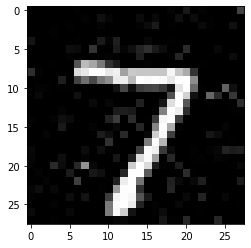

In [13]:
BEST = BEST_X + x_test[0]
plt.imshow(BEST.reshape(28,28),cmap='gray')
plt.show()

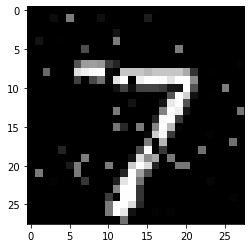

In [14]:
#
BEST = BEST_X + x_test[0]
plt.imshow(BEST.reshape(28,28),cmap='gray')
plt.show()

In [14]:
result=model.predict(BEST_X.reshape(1,784))
result[0]

array([1.2270408e-04, 4.8461512e-05, 1.4535931e-03, 2.8693033e-03,
       1.9180823e-05, 2.3397243e-04, 9.4624681e-07, 9.9419135e-01,
       9.8625685e-05, 9.6184318e-04], dtype=float32)

In [14]:
# test
count = 0
for i in range(784):
    if BEST_X[i] != 0:
        count+=1
print(count)

448


In [15]:
# test
count = 0
for i in range(784):
    if BEST_X[i] > 0.8:
        count+=1
print(count)

4


In [55]:
V=[1.175,0.8,1.5,1.32,1.912]
for i in range(5):
                    if V[i] > 1:
                        V[i] =1-(V[i]-1)
                       
V = [round(i,3) for i in V]
V

[0.825, 0.8, 0.5, 0.68, 0.088]